# StudentPerformance_PyGAD
This is a duplicate notebook from StudentPerformance_with_NN. In this notebook I will use a Genetic Algorithm Library, namely PyGAD to find optimal hyperparameter instead of doing it with Grid Search Corss Validation and empirically in the previous notebooks.

Hyperparameters Grid Search 101: 

https://elutins.medium.com/grid-searching-in-machine-learning-quick-explanation-and-python-implementation-550552200596

References: 

https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

### Index

1. Dataset
2. Packages Needed
3. Data Preprocessing
4. Grid Search Cross Validation
5. Inference
6. Some findings

## 1. Dataset

Source: https://archive.ics.uci.edu/ml/datasets/Student+Performance

### Description

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. 

Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). 

### Note: In this notebook, I used the Dataset with Portuguese Language

In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. 

Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. 

This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd-period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).

### Attribute Information:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

* 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)* 
* 2 sex - student's sex (binary: 'F' - female or 'M' - male)
* 3 age - student's age (numeric: from 15 to 22)
* 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
* 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
* 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* 16 schoolsup - extra educational support (binary: yes or no)
* 17 famsup - family educational support (binary: yes or no)
* 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* 19 activities - extra-curricular activities (binary: yes or no)
* 20 nursery - attended nursery school (binary: yes or no)
* 21 higher - wants to take higher education (binary: yes or no)
* 22 internet - Internet access at home (binary: yes or no)
* 23 romantic - with a romantic relationship (binary: yes or no)
* 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30 absences - number of school absences (numeric: from 0 to 93)

#### these grades are related with the course subject, Math or Portuguese:
* 31 G1 - first period grade (numeric: from 0 to 20)
* 31 G2 - second period grade (numeric: from 0 to 20)
* 32 G3 - final grade (numeric: from 0 to 20, output target)


## 2. Packages Needed

In [112]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)
%matplotlib inline

### 3. Data Preprocessing

Here, I will find for empty data, encode categorical data, plot some graph to understand the data.

In [58]:
df = pd.read_csv("student-por.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [59]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [60]:
# df.dtypes

In [61]:
# df.isnull().sum() 
# Check for missing data

In [62]:
features_list = list(df.columns)[:-1]
print("Features: {x}".format(x = features_list))
print("\nNumber of Features: {x}".format(x = len(features_list)))

Features: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']

Number of Features: 32


In [63]:
# df.info()
# # Check datatype of features

In [64]:
features = df.drop(["G3"], axis = 1)
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10


In [65]:
target = df.drop(features_list, axis = 1)
target

,G3
0,11
1,11
2,12
3,14
4,13
...,...
644,10
645,16
646,9
647,10


In [66]:
mapping_school = {'GP' : 0, 'MS' : 1}
mapping_sex = {'F' : 0, 'M' : 1}
mapping_address = {'U' : 0, 'R' : 1}
mapping_famsize = {'GT3' : 0, 'LE3' : 1}
mapping_pstatus = {'A' : 0, 'T' : 1}
mapping_mjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_fjob = {'at_home' : 0, 'health' : 1, 'other' : 2, 'services' : 3, 'teacher' : 4}
mapping_reason = {'course' : 0, 'other' : 1, 'home' : 2, 'reputation' : 3}
mapping_guardian = {'mother' : 0, 'father' : 1, 'other': 2}
mapping_schoolsup = {'no' : 0, 'yes' : 1}
mapping_famsup = {'no' : 0, 'yes' : 1}
mapping_romantic = {'no' : 0, 'yes' : 1}
mapping_paid = {'no' : 0, 'yes' : 1}
mapping_activities = {'no' : 0, 'yes' : 1}
mapping_nursery = {'no' : 0, 'yes' : 1}
mapping_higher = {'no' : 0, 'yes' : 1}
mapping_internet = {'no' : 0, 'yes' : 1}

In [67]:
features['school'] = features['school'].map(mapping_school)
features['sex'] = features['sex'].map(mapping_sex)
features['address'] = features['address'].map(mapping_address)
features['famsize'] = features['famsize'].map(mapping_famsize)
features['Pstatus'] = features['Pstatus'].map(mapping_pstatus)
features['Mjob'] = features['Mjob'].map(mapping_mjob)
features['Fjob'] = features['Fjob'].map(mapping_fjob)
features['reason'] = features['reason'].map(mapping_reason)
features['guardian'] = features['guardian'].map(mapping_guardian).astype('Int64')
features['famsup'] = features['famsup'].map(mapping_famsup)
features['schoolsup'] = features['schoolsup'].map(mapping_schoolsup)
features['romantic'] = features['romantic'].map(mapping_romantic)
features['paid'] = features['paid'].map(mapping_paid)
features['activities'] = features['activities'].map(mapping_activities)
features['nursery'] = features['nursery'].map(mapping_nursery)
features['higher'] = features['higher'].map(mapping_higher)
features['internet'] = features['internet'].map(mapping_internet)


In [68]:
features

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,0,0,0,4,4,0,4,0,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11
1,0,0,17,0,0,1,1,1,0,2,0,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11
2,0,0,15,0,1,1,1,1,0,2,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13
3,0,0,15,0,0,1,4,2,1,3,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14
4,0,0,16,0,0,1,3,3,2,2,2,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,1,0,1,2,3,3,2,0,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11
645,1,0,18,0,1,1,3,1,4,3,0,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15
646,1,0,18,0,0,1,1,1,2,2,0,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12
647,1,1,17,0,1,1,3,1,3,3,0,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10


In [69]:
# features.dtypes

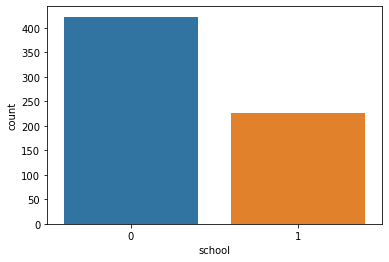

In [70]:
sns.countplot(x='school', data=features);

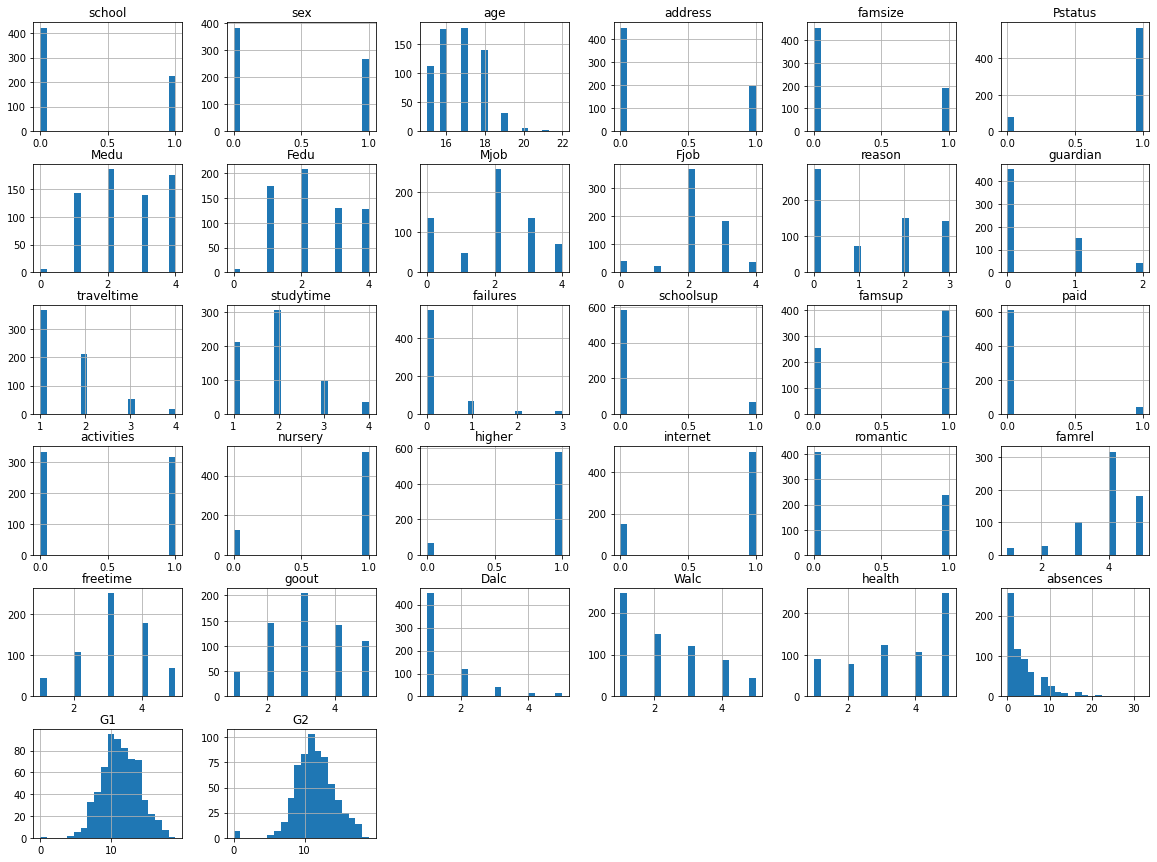

In [71]:
features.hist(bins=20, figsize=(20,15));

## 4. Grid Search Cross Validation

Here the real thing begins. We will use Sci-Kit Learn's GridSearchCV to find the optimal hypter parameters for the model for this problem.

#### To be tuned:

1. Batch Size & Number of Epochs with Training Optimization Algorithm
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

#### Search/Tuning Flow:
1. Define Model
2. Wrap Keras model with KerasRegressor of Sci-Kit Learn
3. Define Grid Parameters
4. Train model with Grid Parameters defined
5. Summarize Results

Note: Set verbose = 0, as it's gonna be long list.

#### Data normalization

In [120]:
x = features
y = target
scaler_x = preprocessing.MinMaxScaler()
scaler_y = preprocessing.MinMaxScaler()
print(scaler_x.fit(x))
xscale =scaler_x.transform(x)
print(scaler_y.fit(y))
yscale =scaler_y.transform(y)

MinMaxScaler()
MinMaxScaler()


#### Split Training and Testing data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size = 0.3)

In [76]:
# xscale, yscale

### Here we go!

### Batch Size & Number of Epochs with Training Optimization Algorithm 

1. ###### Batch Size & Number of Epochs with Training Optimization Algorithm (This section)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm 
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

Based on the best parameter obtained, we can further fine tune it. For instance, the Adam optimizer used with default Learning Rate of 0.001. Here, GridSearchCV is used again to search for best Learning Rate.

In [125]:
def create_model(optimizer='adam'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
    
    #model.summary()
    
    return model

model = create_model()
model.summary()

Model: "sequential_367"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1468 (Dense)           (None, 32)                1056      
_________________________________________________________________
dense_1469 (Dense)           (None, 64)                2112      
_________________________________________________________________
dense_1470 (Dense)           (None, 32)                2080      
_________________________________________________________________
dense_1471 (Dense)           (None, 1)                 33        
Total params: 5,281
Trainable params: 5,281
Non-trainable params: 0
_________________________________________________________________


In [126]:
model = KerasRegressor(build_fn=create_model, verbose=0)

In [127]:
# define the grid search parameters
batch_size = [10, 50]
epochs = [10, 50, 100, 200, 500, 700, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adam']


param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [128]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.005965 using {'batch_size': 10, 'epochs': 500, 'optimizer': 'Adam'}
-0.028463 (0.004721) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'SGD'}
-0.015968 (0.003097) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'RMSprop'}
-0.025240 (0.003616) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adagrad'}
-0.015238 (0.002083) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}
-0.017206 (0.002360) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'SGD'}
-0.145098 (0.191964) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'RMSprop'}
-0.022524 (0.001170) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adagrad'}
-0.146513 (0.190964) with: {'batch_size': 10, 'epochs': 50, 'optimizer': 'Adam'}
-0.157444 (0.202528) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'SGD'}
-0.011094 (0.000877) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'RMSprop'}
-0.020580 (0.002711) with: {'batch_size': 10, 'epochs': 100, 'optimizer': 'Adagrad'}
-0.010374 (0.0

Some reading on the negative values on scoring : 

https://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error

### Learning Rate

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. ###### Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (This section)
4. Network Weight Initialization
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

Based on the best parameter obtained, we can further fine tune it. For instance, the Adam optimizer used with default Learning Rate of 0.001. Here, GridSearchCV is used again to search for best Learning Rate.

In [147]:
def create_model_Adam(learn_rate=0.001):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = learn_rate)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_Adam = KerasRegressor(build_fn=create_model_Adam, epochs=500, batch_size=10,  verbose=0)

In [148]:
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]

param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model_Adam, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [149]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.008608 using {'learn_rate': 0.01}
-0.282835 (0.194689) with: {'learn_rate': 0.001}
-0.008608 (0.002567) with: {'learn_rate': 0.01}
-0.428273 (0.011470) with: {'learn_rate': 0.1}
-0.428273 (0.011470) with: {'learn_rate': 0.2}
-0.428273 (0.011470) with: {'learn_rate': 0.3}


### Network Weight Initialization

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. ###### Network Weight Initialization(This section)
5. Neuron Activation Function
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer


In [150]:
def create_model_weight_init(init_mode = 'uniform'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer=init_mode),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_weight_init = KerasRegressor(build_fn=create_model_weight_init, epochs=500, batch_size=10, verbose=0)

In [151]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model_weight_init, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [152]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.006276 using {'init_mode': 'glorot_normal'}
-0.007148 (0.001306) with: {'init_mode': 'uniform'}
-0.007395 (0.000859) with: {'init_mode': 'lecun_uniform'}
-0.007029 (0.002231) with: {'init_mode': 'normal'}
-0.428273 (0.011470) with: {'init_mode': 'zero'}
-0.006276 (0.001090) with: {'init_mode': 'glorot_normal'}
-0.006986 (0.001367) with: {'init_mode': 'glorot_uniform'}
-0.006326 (0.000991) with: {'init_mode': 'he_normal'}
-0.007320 (0.001293) with: {'init_mode': 'he_uniform'}


### Neuron Activation Function

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. ###### Neuron Activation Function (This section)
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer

In [153]:
def create_model_act_func(activation='relu', output_activation = 'sigmoid'):
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer='glorot_normal'),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation=output_activation)
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_act_func = KerasRegressor(build_fn=create_model_act_func, epochs=500, batch_size=10, verbose=0)

In [ ]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
output_activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation, output_activation=output_activation)
grid = GridSearchCV(estimator=model_act_func, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Dropout Regularization

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=ReLU, output_activation = 'sigmoid')
6. ###### Dropout Regularization (This section)
7. Number of Neurons in the Hidden Layer

### Check if the model is overfitting. 
If overfit --> add Dropout layer to regularize it, else skip having dropout layer(s).

In [ ]:
def create_model_current():
    
    model = Sequential([
        Dense(32, input_dim=32, activation='relu', kernel_initializer='glorot_normal'),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation=output_activation)
    ])
    optimizer = Adam(lr = 0.01)
    
    model.compile(
    loss='mse', 
    optimizer=optimizer, 
    metrics=['mse', 'mae'])
        
    return model

model_current = create_model_current()

In [ ]:
history = model.fit(X_train, y_train, epochs=500, batch_size=10,  verbose=1, validation_split=0.2)

In [ ]:
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
output_activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation, output_activation=output_activation)
grid = GridSearchCV(estimator=model_act_func, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

### Neuron Activation Function

1. Batch Size & Number of Epochs with Training Optimization Algorithm 
(Best Params : Batch Size: 10, Epochs = 500, Optimzation Algorithm: Adam)
3. Learning Rate & Momentum(if applies) of the optimal Training Optimization Algorithm (Learning Rate = 0.01)
4. Network Weight Initialization(glorot_normal)
5. Neuron Activation Function (activation=ReLU, output_activation = 'sigmoid')
6. Dropout Regularization
7. Number of Neurons in the Hidden Layer(This section)

In [ ]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
output_activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation, output_activation=output_activation)
grid = GridSearchCV(estimator=model_act_func, param_grid=param_grid, n_jobs=None, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

#### Grid Searched CV's model

With the best parameter GridSearchCV could find based on given set of parameters grid. Now we instantiate a model and train it.

In [ ]:
model_gridsearched = 

{'batch_size': 10, 'epochs': 10, 'optimizer': 'Adam'}

In [82]:
history = model.fit(X_train, y_train, epochs=500, batch_size=10,  verbose=1, validation_split=0.2)

Epoch 1/500
8/8 [==============================] - 0s 9ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 6/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - ac

Epoch 125/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 126/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 127/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 128/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 129/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 130/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 131/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 132/500
8/8 [==============================] - 0s 3ms/step - lo

Epoch 248/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 249/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 250/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 251/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 252/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 253/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 254/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 255/500
8/8 [==============================] - 0s 3ms/step - lo

Epoch 371/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 372/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 373/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 374/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 375/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 376/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 377/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 378/500
8/8 [==============================] - 0s 3ms/step - lo

Epoch 494/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 495/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 496/500
8/8 [==============================] - 0s 4ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 497/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 498/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 499/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110
Epoch 500/500
8/8 [==============================] - 0s 3ms/step - loss: 75.6088 - acc: 0.0248 - val_loss: 68.3077 - val_acc: 0.0110


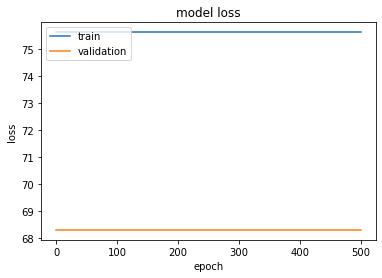

In [83]:
# print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Inference

In [84]:
df2 = features.iloc[14] # Test with the 14th Student 
Xnew = np.array([df2])
Xnew.reshape(1, -1)
Xnew= scaler_x.transform(Xnew)
ynew= model.predict(Xnew)

#invert normalize
ynew = scaler_y.inverse_transform(ynew) 
Xnew = scaler_x.inverse_transform(Xnew)

#print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
print("Predicted G3's score is {:.2f}".format(float(ynew[0])))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1/1 [==============================] - 0s 527us/step
Predicted G3's score is 0.00


In [282]:
loss, mean_sq_e, mean_abs_e = model.evaluate(X_test, y_test, batch_size=1,verbose=0)
print(model.metrics_names)
print("Mean Squared Error : {:.5f}".format(mean_sq_e))
print("Mean Absolute Error : {:.5f}".format(mean_abs_e))

['loss', 'mse', 'mae']
Mean Squared Error : 0.01136
Mean Absolute Error : 0.07510


In [284]:
diff_list = []
large_diff_count = 0
for i in range(0,len(target)):
    print(i)
    df2 = features.iloc[i] # Test with the 14th Student 
    target2 = target.iloc[i].values[0]
    print("Real Values :", target2)
    Xnew = np.array([df2])
    Xnew.reshape(1, -1)
    Xnew= scaler_x.transform(Xnew)
    ynew= model.predict(Xnew)

    #invert normalize
    ynew = scaler_y.inverse_transform(ynew) 
    Xnew = scaler_x.inverse_transform(Xnew)
    predicted = float(ynew[0])
    #print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))
    print("Predicted G3's score is {:.2f}".format(predicted))
    diff = np.abs(predicted-target2)
    print("Difference : {:.3f}".format(diff))
    diff_list.append(diff)
    
    if diff > mean_abs_e:
        large_diff_count = large_diff_count + 1
print("\nNumber of predicted score that exceed Mean Abs Error : ",large_diff_count)

0
Real Values : 11
Predicted G3's score is 10.99
Difference : 0.011
1
Real Values : 11
Predicted G3's score is 10.89
Difference : 0.106
2
Real Values : 12
Predicted G3's score is 12.05
Difference : 0.054
3
Real Values : 14
Predicted G3's score is 14.51
Difference : 0.508
4
Real Values : 13
Predicted G3's score is 12.92
Difference : 0.080
5
Real Values : 13
Predicted G3's score is 12.84
Difference : 0.161
6
Real Values : 13
Predicted G3's score is 12.99
Difference : 0.006
7
Real Values : 13
Predicted G3's score is 12.89
Difference : 0.113
8
Real Values : 17
Predicted G3's score is 16.99
Difference : 0.007
9
Real Values : 13
Predicted G3's score is 12.96
Difference : 0.040
10
Real Values : 14
Predicted G3's score is 13.91
Difference : 0.095
11
Real Values : 13
Predicted G3's score is 12.82
Difference : 0.182
12
Real Values : 12
Predicted G3's score is 10.38
Difference : 1.625
13
Real Values : 13
Predicted G3's score is 12.90
Difference : 0.101
14
Real Values : 15
Predicted G3's score is 

Predicted G3's score is 9.00
Difference : 0.005
126
Real Values : 11
Predicted G3's score is 9.88
Difference : 1.120
127
Real Values : 11
Predicted G3's score is 7.31
Difference : 3.692
128
Real Values : 15
Predicted G3's score is 14.96
Difference : 0.039
129
Real Values : 13
Predicted G3's score is 9.94
Difference : 3.057
130
Real Values : 12
Predicted G3's score is 11.94
Difference : 0.059
131
Real Values : 8
Predicted G3's score is 7.86
Difference : 0.137
132
Real Values : 11
Predicted G3's score is 10.90
Difference : 0.099
133
Real Values : 13
Predicted G3's score is 12.94
Difference : 0.060
134
Real Values : 12
Predicted G3's score is 11.94
Difference : 0.062
135
Real Values : 14
Predicted G3's score is 13.93
Difference : 0.073
136
Real Values : 11
Predicted G3's score is 10.93
Difference : 0.071
137
Real Values : 11
Predicted G3's score is 11.03
Difference : 0.035
138
Real Values : 11
Predicted G3's score is 10.97
Difference : 0.031
139
Real Values : 15
Predicted G3's score is 14

Predicted G3's score is 10.40
Difference : 0.396
252
Real Values : 13
Predicted G3's score is 12.99
Difference : 0.012
253
Real Values : 10
Predicted G3's score is 10.00
Difference : 0.002
254
Real Values : 10
Predicted G3's score is 9.92
Difference : 0.079
255
Real Values : 7
Predicted G3's score is 6.94
Difference : 0.057
256
Real Values : 8
Predicted G3's score is 9.95
Difference : 1.954
257
Real Values : 9
Predicted G3's score is 8.97
Difference : 0.029
258
Real Values : 15
Predicted G3's score is 14.95
Difference : 0.049
259
Real Values : 10
Predicted G3's score is 11.88
Difference : 1.880
260
Real Values : 11
Predicted G3's score is 11.03
Difference : 0.025
261
Real Values : 13
Predicted G3's score is 13.63
Difference : 0.635
262
Real Values : 8
Predicted G3's score is 7.88
Difference : 0.117
263
Real Values : 8
Predicted G3's score is 5.83
Difference : 2.167
264
Real Values : 10
Predicted G3's score is 9.95
Difference : 0.054
265
Real Values : 15
Predicted G3's score is 14.95
Di

Predicted G3's score is 17.02
Difference : 0.021
379
Real Values : 10
Predicted G3's score is 9.96
Difference : 0.043
380
Real Values : 13
Predicted G3's score is 10.66
Difference : 2.343
381
Real Values : 15
Predicted G3's score is 13.95
Difference : 1.054
382
Real Values : 11
Predicted G3's score is 10.99
Difference : 0.014
383
Real Values : 12
Predicted G3's score is 8.94
Difference : 3.057
384
Real Values : 10
Predicted G3's score is 9.98
Difference : 0.018
385
Real Values : 10
Predicted G3's score is 10.60
Difference : 0.599
386
Real Values : 15
Predicted G3's score is 14.97
Difference : 0.032
387
Real Values : 15
Predicted G3's score is 15.14
Difference : 0.144
388
Real Values : 12
Predicted G3's score is 11.95
Difference : 0.047
389
Real Values : 12
Predicted G3's score is 11.06
Difference : 0.938
390
Real Values : 14
Predicted G3's score is 15.18
Difference : 1.185
391
Real Values : 14
Predicted G3's score is 13.63
Difference : 0.371
392
Real Values : 15
Predicted G3's score is

Predicted G3's score is 9.00
Difference : 0.001
509
Real Values : 18
Predicted G3's score is 16.37
Difference : 1.627
510
Real Values : 17
Predicted G3's score is 17.03
Difference : 0.032
511
Real Values : 10
Predicted G3's score is 9.98
Difference : 0.022
512
Real Values : 7
Predicted G3's score is 7.66
Difference : 0.665
513
Real Values : 8
Predicted G3's score is 8.01
Difference : 0.013
514
Real Values : 7
Predicted G3's score is 7.01
Difference : 0.005
515
Real Values : 10
Predicted G3's score is 9.93
Difference : 0.068
516
Real Values : 16
Predicted G3's score is 16.46
Difference : 0.460
517
Real Values : 15
Predicted G3's score is 13.56
Difference : 1.439
518
Real Values : 8
Predicted G3's score is 7.36
Difference : 0.635
519
Real Values : 0
Predicted G3's score is 0.00
Difference : 0.000
520
Real Values : 8
Predicted G3's score is 7.95
Difference : 0.053
521
Real Values : 10
Predicted G3's score is 9.94
Difference : 0.059
522
Real Values : 8
Predicted G3's score is 9.63
Differen

Predicted G3's score is 9.03
Difference : 0.030
636
Real Values : 19
Predicted G3's score is 18.97
Difference : 0.031
637
Real Values : 0
Predicted G3's score is 6.88
Difference : 6.875
638
Real Values : 16
Predicted G3's score is 15.98
Difference : 0.020
639
Real Values : 0
Predicted G3's score is 6.22
Difference : 6.218
640
Real Values : 0
Predicted G3's score is 0.00
Difference : 0.000
641
Real Values : 15
Predicted G3's score is 14.86
Difference : 0.135
642
Real Values : 11
Predicted G3's score is 10.16
Difference : 0.843
643
Real Values : 10
Predicted G3's score is 9.92
Difference : 0.078
644
Real Values : 10
Predicted G3's score is 10.09
Difference : 0.090
645
Real Values : 16
Predicted G3's score is 15.62
Difference : 0.378
646
Real Values : 9
Predicted G3's score is 11.83
Difference : 2.826
647
Real Values : 10
Predicted G3's score is 10.00
Difference : 0.001
648
Real Values : 11
Predicted G3's score is 11.03
Difference : 0.030

Number of predicted score that exceed Mean Abs Er